# check if gpu is working

In [ ]:
!nvidia-smi

 #copy the entire dataset directory from /kaggle/input to /kaggle/working:

In [ ]:
!cp -r /kaggle/input/run-from-pre/runs /kaggle/working/

#copying one file in kaggle

In [ ]:
import os
import yaml
import shutil

# Define paths
input_yaml_path = '/kaggle/input/training/data.yaml'
output_yaml_path = '/kaggle/working/Dataset/data.yaml'

# Check if the input YAML file exists
if os.path.exists(input_yaml_path):
    # Copy the YAML file from input directory to output directory
    shutil.copyfile(input_yaml_path, output_yaml_path)
    print(f"Copied {input_yaml_path} to {output_yaml_path}")

Verify the Copy

In [ ]:
!ls '/kaggle/working/'

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [15]:
!pip install -U ultralytics


from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.60 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [17]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# Clear output folder
import os

def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working/'
remove_folder_contents(folder_path)
#os.rmdir(folder_path)

#edit the yaml file

In [ ]:
import yaml

# Load the YAML file
with open('/kaggle/working/Dataset/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update the 'names' list by removing the first character of each name
data['names'] = [name[1:] for name in data['names']]

# Update the 'train' and 'val' paths
data['train'] = '/kaggle/working/Dataset/train/images'
data['val'] = '/kaggle/working/Dataset/valid/images'

# Save the updated YAML file
with open('/kaggle/working/Dataset/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)


In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

train

In [ ]:
%cd {HOME}

!yolo train resume model=/kaggle/working/runs/detect/train/weights/last.pt data=/kaggle/working/Dataset/data.yaml epochs=300 imgsz=800 device=0,1

In [ ]:
# Clear output folder
import os

def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working/run-from-pre'
remove_folder_contents(folder_path)
#os.rmdir(folder_path)


In [ ]:
ls {HOME}/runs/detect/train/

/kaggle/working


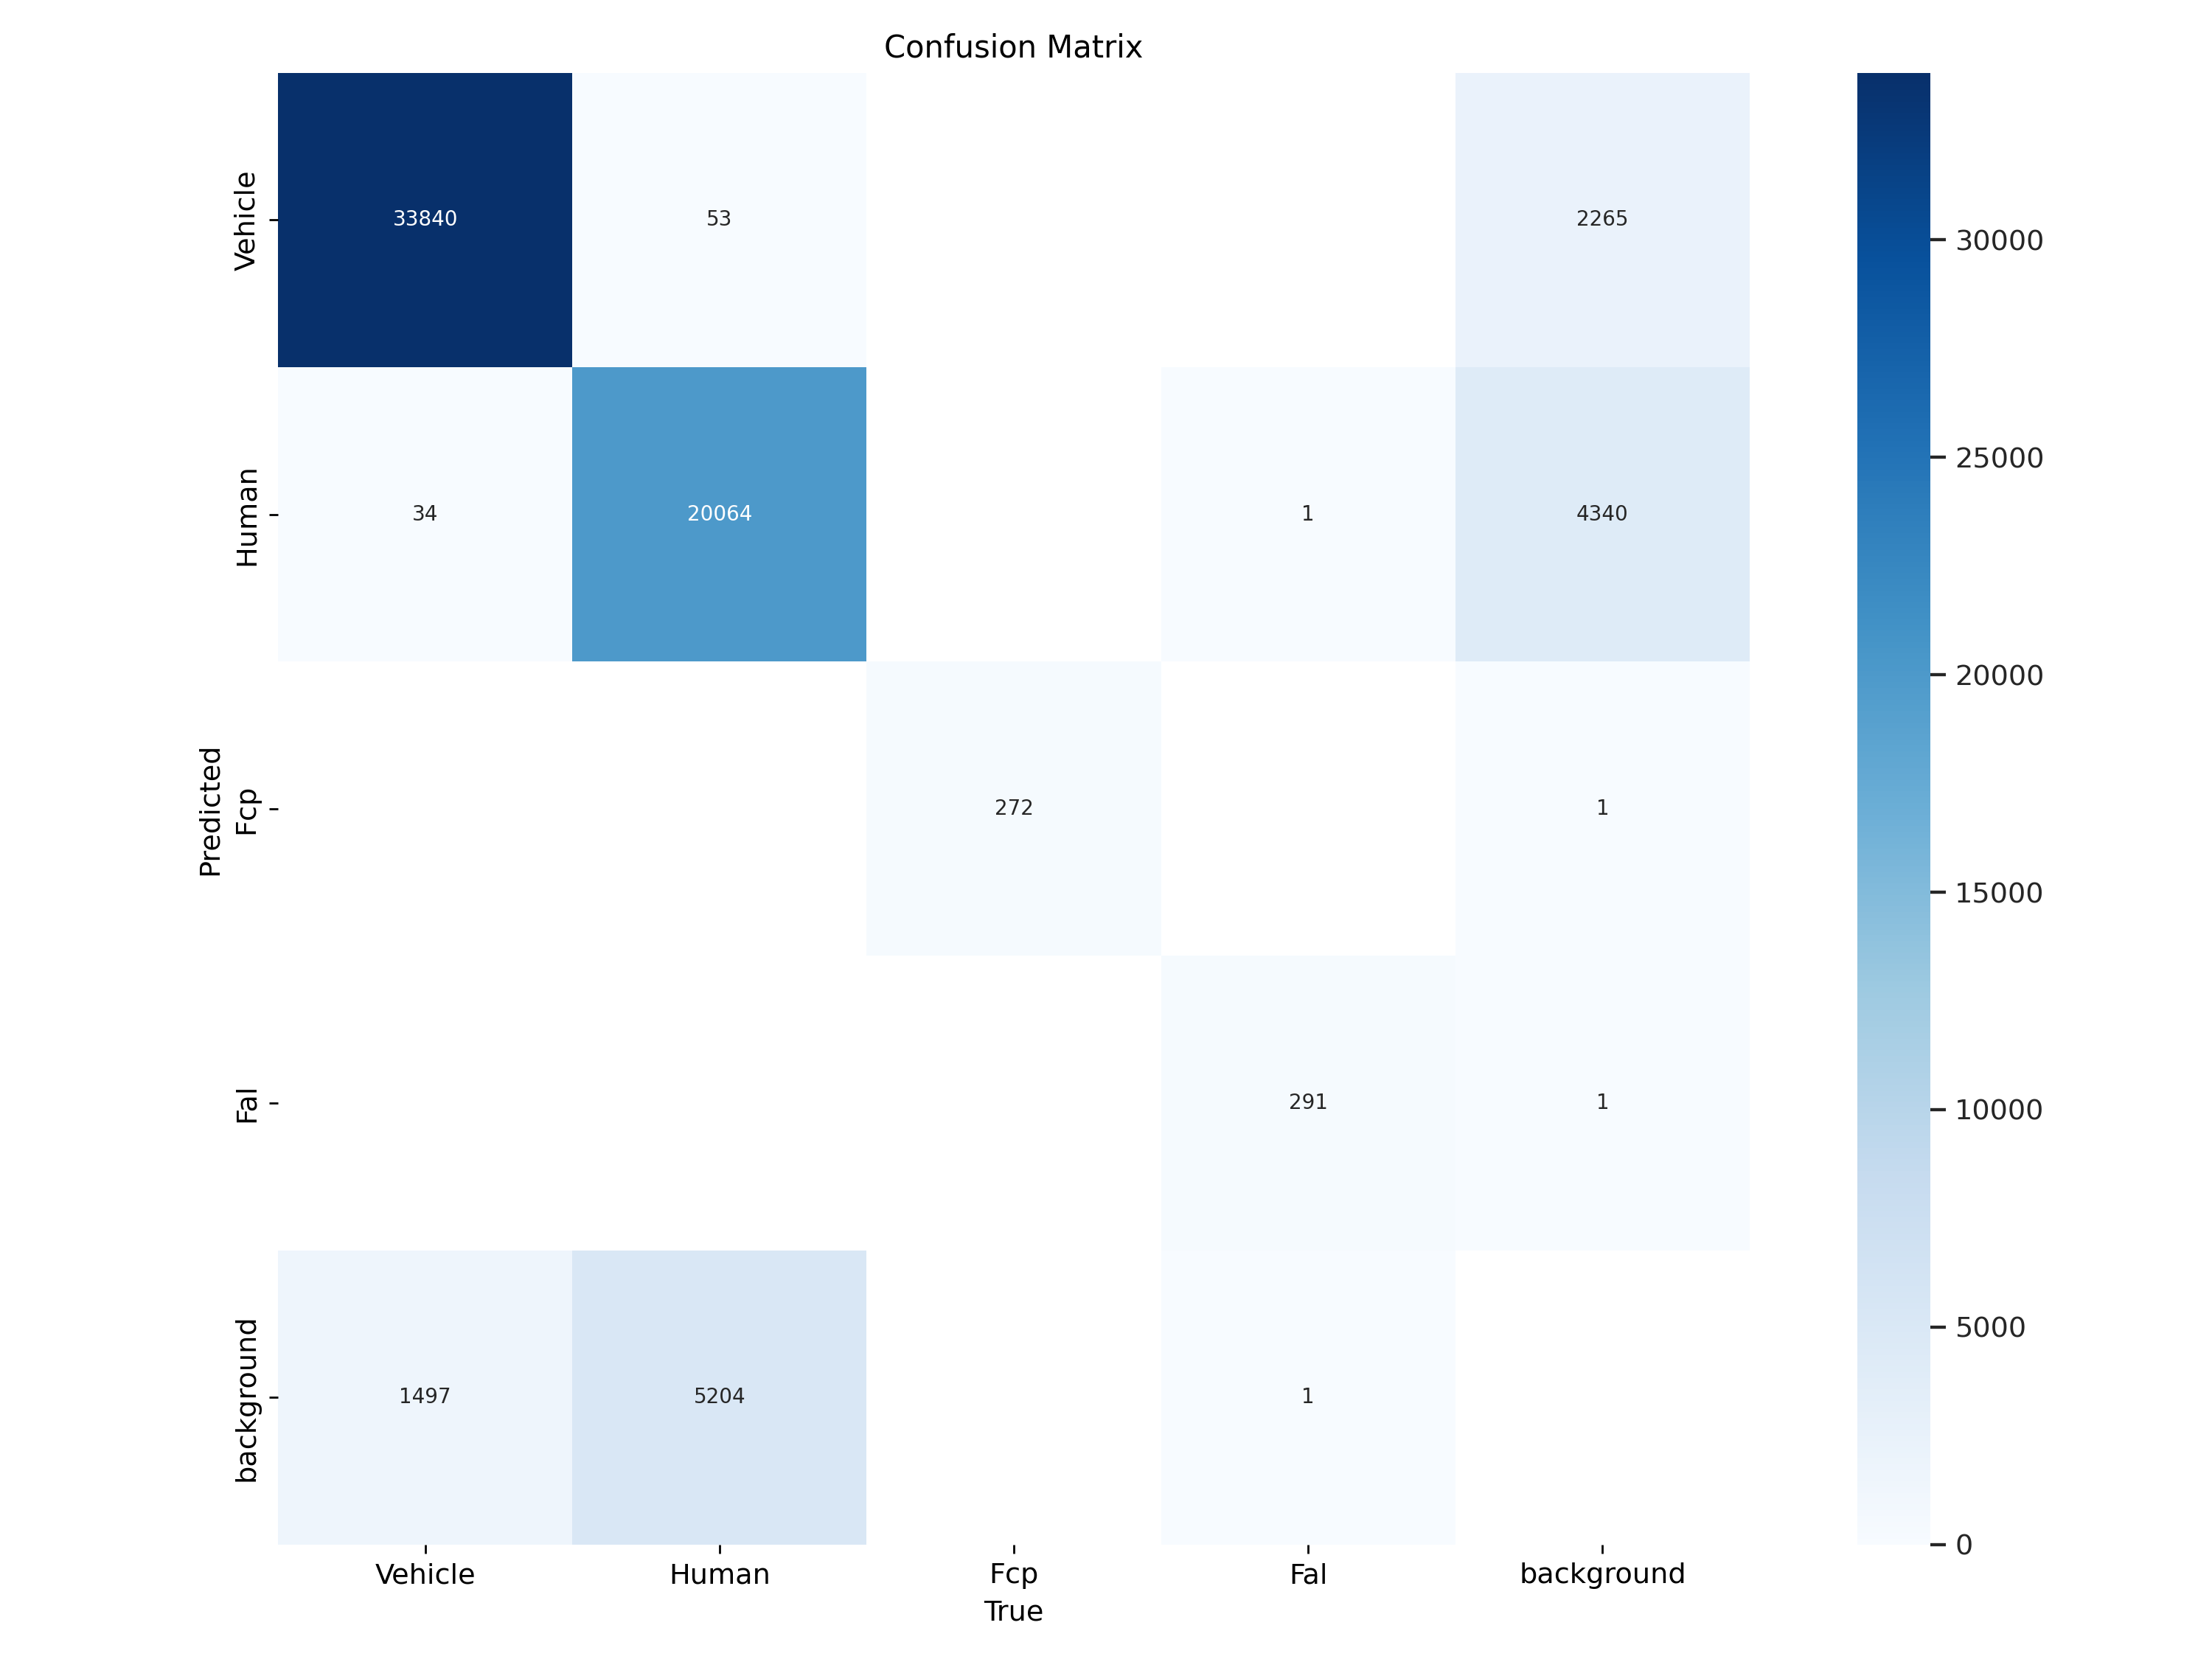

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


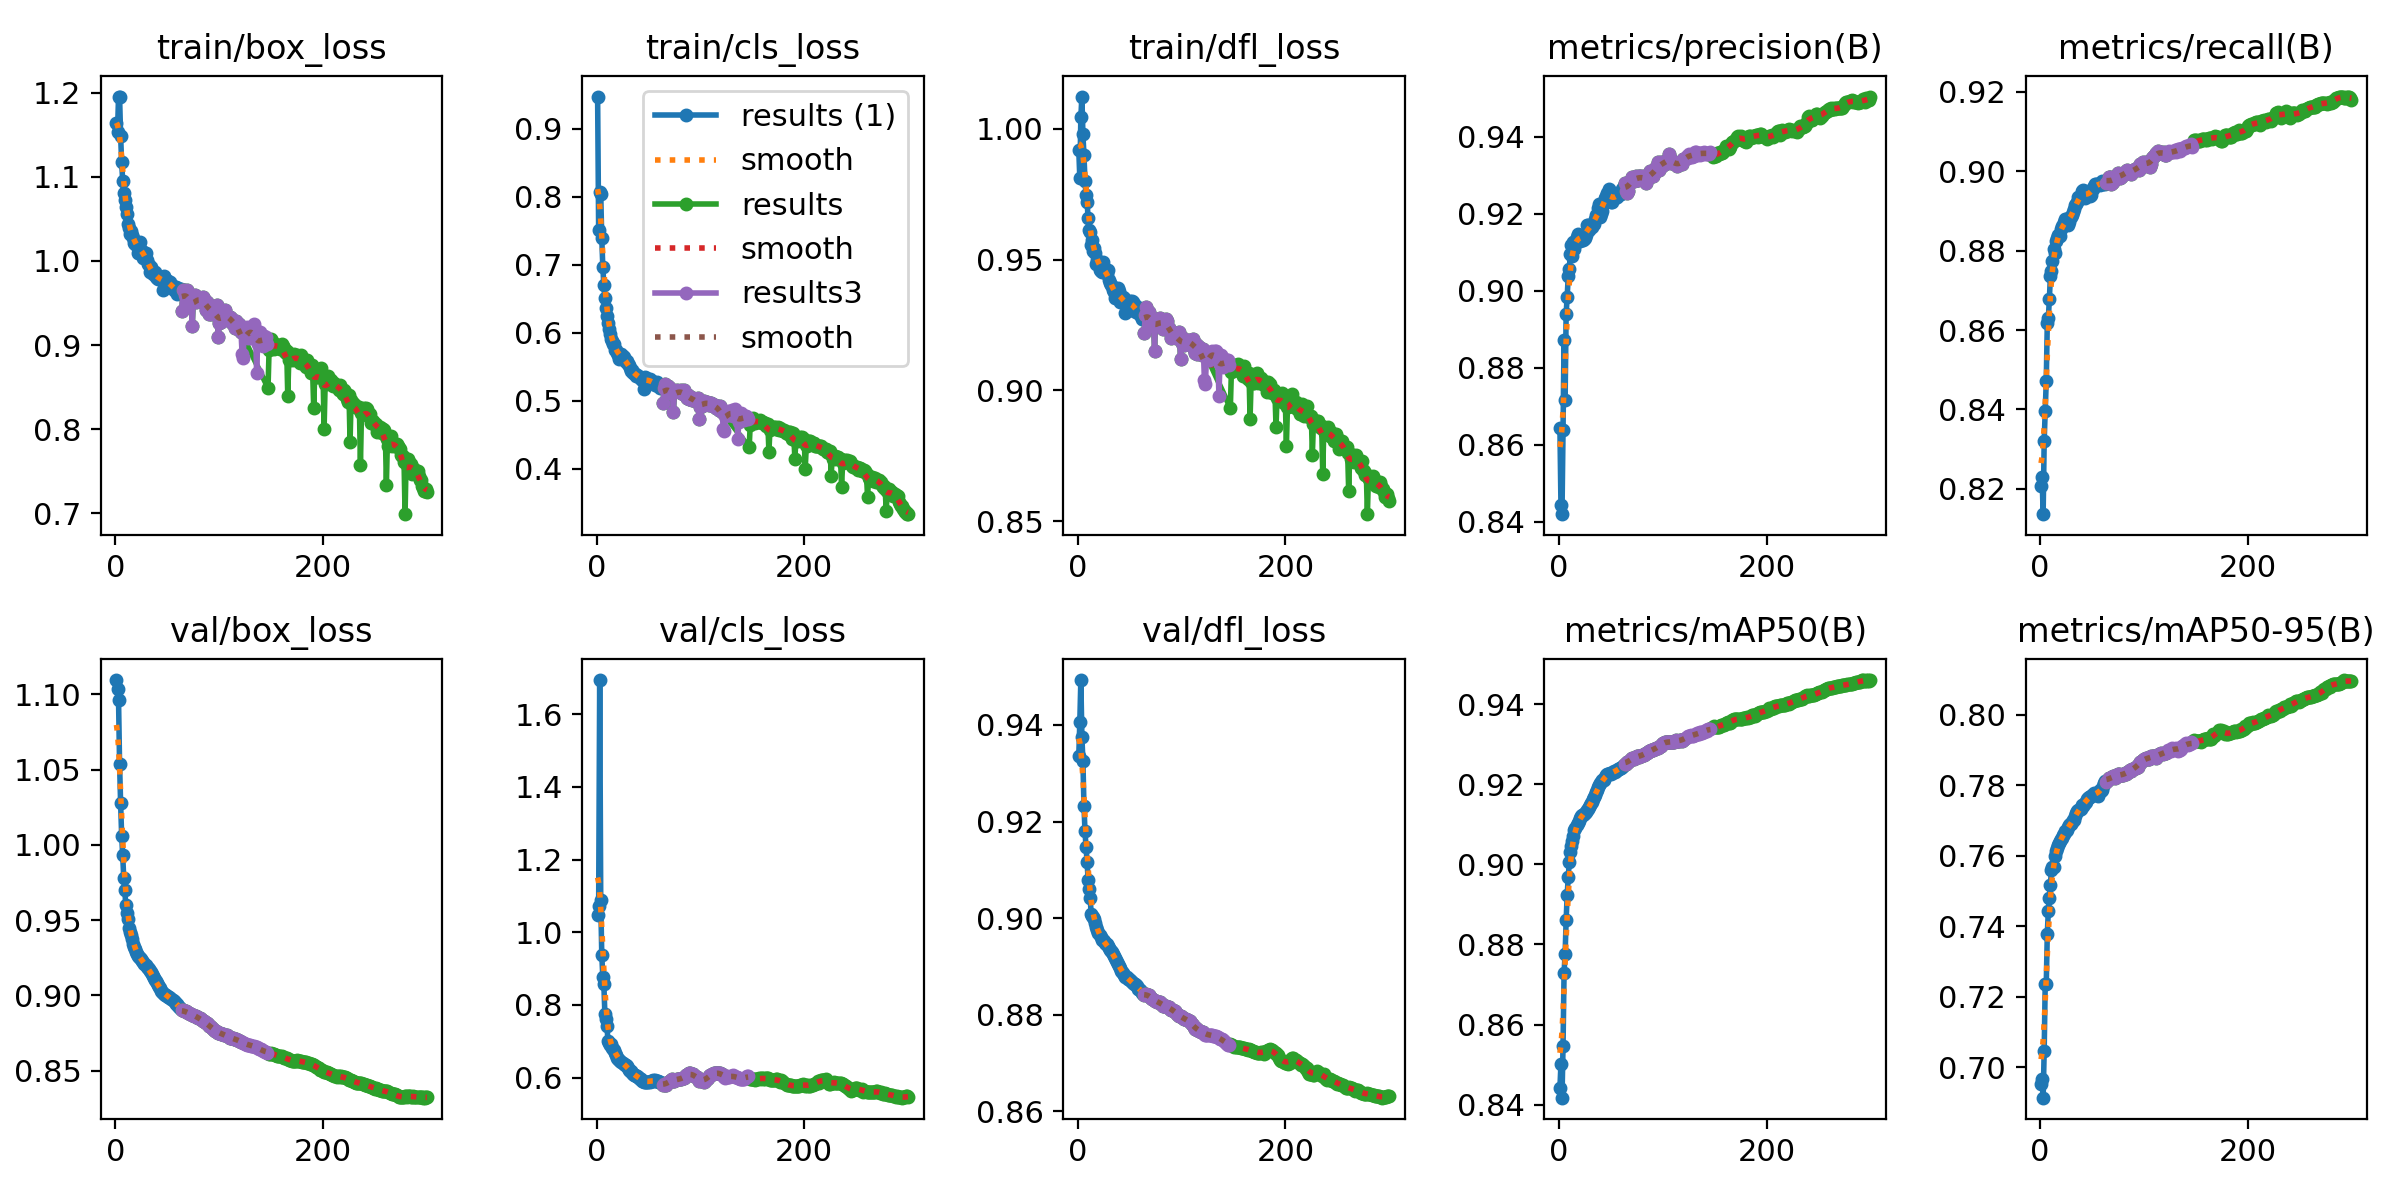

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1020)

/kaggle/working


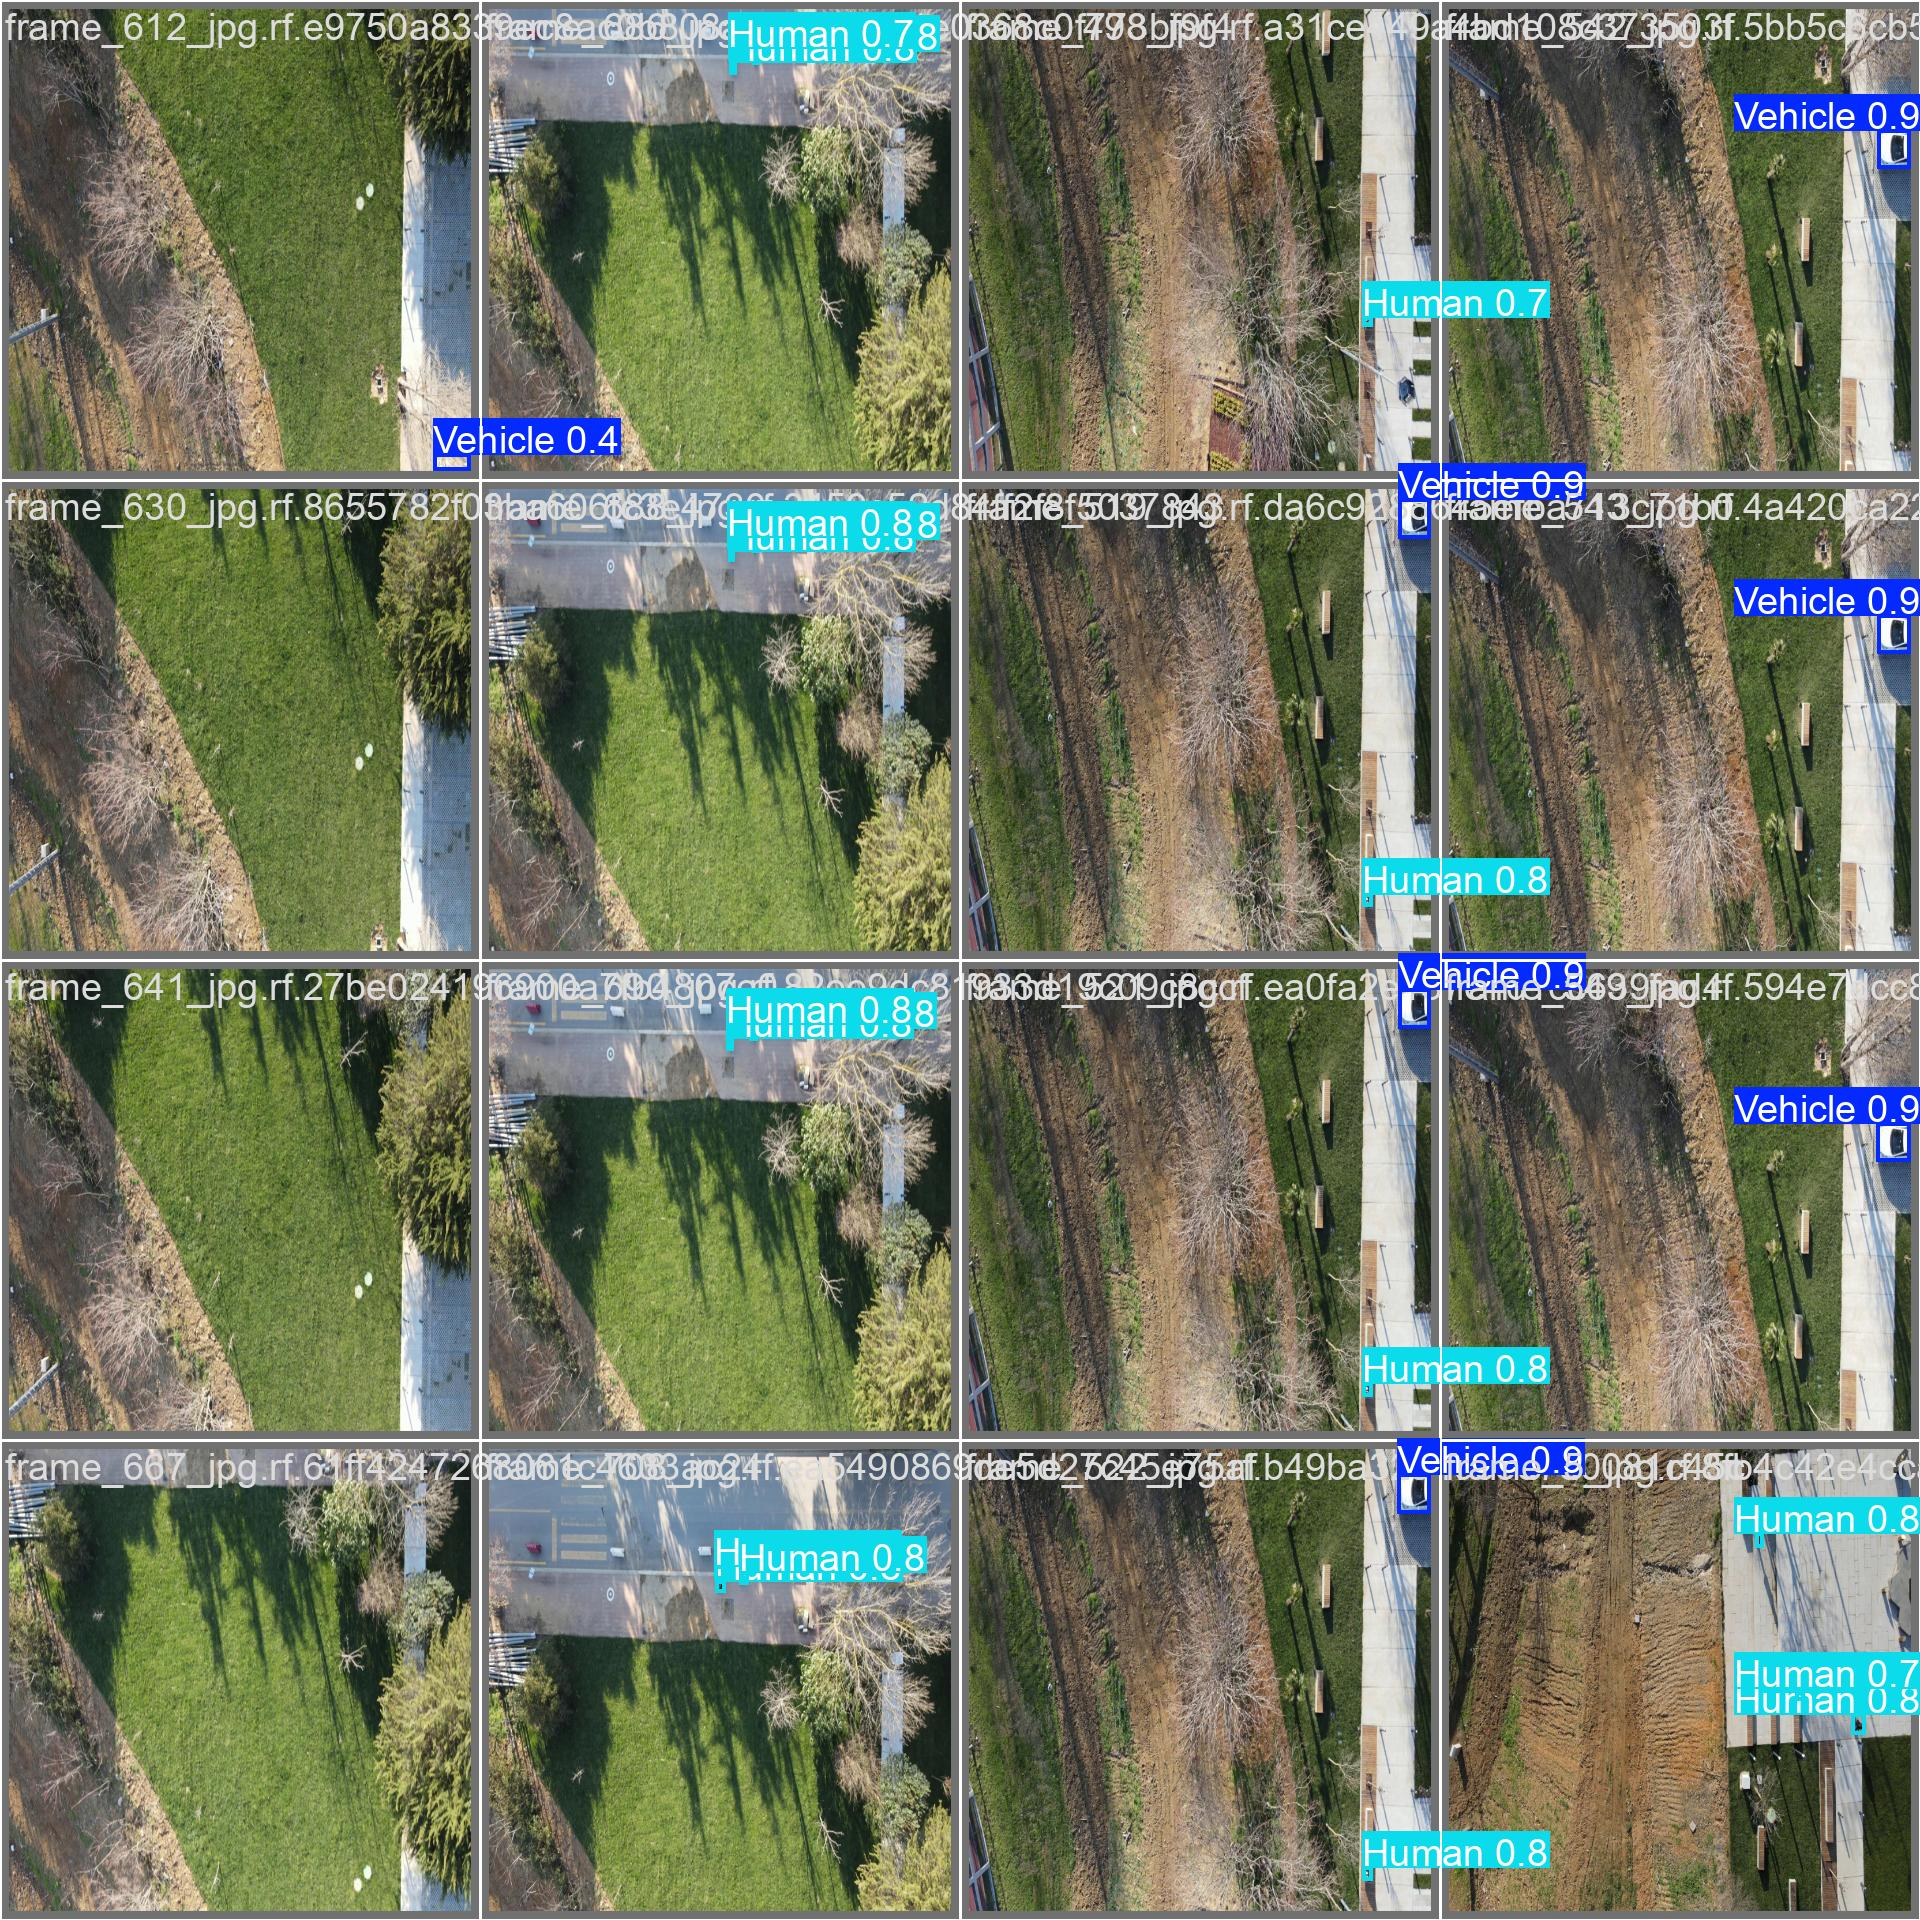

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1020)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/Dataset/data.yaml

/kaggle/working
/bin/bash: yolo: command not found


#use this after train finish to move runs to drive

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.3 source=/kaggle/working/Dataset/test/images save=True

Ultralytics YOLOv8.2.60 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

image 1/2404 /kaggle/working/Dataset/test/images/00074b93-ccdb-40cf-af38-98ac759919f8_jpg.rf.7d32e85b42a46d3be39283e56e3e1c8a.jpg: 800x800 1 Vehicle, 4379.8ms
image 2/2404 /kaggle/working/Dataset/test/images/000a73bd-99b1-4638-95d4-58759d354104_jpg.rf.616a9d74b2624caf5372dad0e3638194.jpg: 800x800 3 Humans, 3410.3ms
image 3/2404 /kaggle/working/Dataset/test/images/000b0a6a-7a58-4211-9c5f-deb530c37694_jpg.rf.de6db6dc37bc289984a39b2062d1d664.jpg: 800x800 7 Vehicles, 32 Humans, 2264.9ms
image 4/2404 /kaggle/working/Dataset/test/images/000f6021-131d-4e85-aa93-439c642d592f_jpg.rf.3ac23ec739c5c3afa8ec4db3a2ebd4c4.jpg: 800x800 2 Vehicles, 2172.5ms
image 5/2404 /kaggle/working/Dataset/test/images/00121aaf-da37-445e-900e-ad330b0876b2_jpg.rf.cf60014d75c8a5d20fdbb03ba2c954c6.jpg: 800x800 3 Vehicles, 2171.5ms
image 6/2404 /kaggle/worki

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!scp -r /content/runs '/content/gdrive/My Drive/spesify the folder'